In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
kwargs = {'size': 3, 'aspect': 2}
mypalette = ['#ddaa33','#bb5566','#004488','#004488']

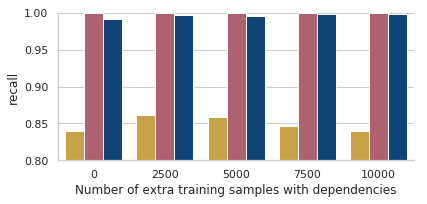

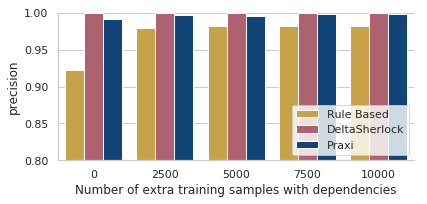

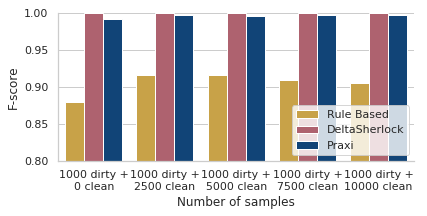

In [22]:
df = pd.read_csv('/home/ates/deltasherlock/experiments/plots/results.csv')

sns.factorplot(data=df, x='dirty_count', hue='method', y='recall', 
               hue_order=['Rule Based', 'DeltaSherlock', 'Praxi'], 
               palette=mypalette, legend=False, kind='bar', **kwargs)
plt.ylim((0.8, 1))
plt.xlabel('Number of extra training samples with dependencies')
#plt.savefig('/home/ates/prospectus/figures/ds_recall.pdf')

sns.factorplot(data=df, x='dirty_count', hue='method', y='precision', 
               hue_order=['Rule Based', 'DeltaSherlock', 'Praxi'], 
               palette=mypalette, **kwargs,
               kind='bar', legend=False)
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of extra training samples with dependencies')
#plt.savefig('/home/ates/prospectus/figures/ds_precision.pdf')

df['F-score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='F-score', 
                   hue_order=['Rule Based', 'DeltaSherlock', 'Praxi'], 
                   palette=mypalette, **kwargs,
                   kind='bar', legend=False)
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
g.set_xticklabels(['1000 dirty +\n%d clean' % (x * 2500) for x in range(5)])
#plt.xlabel('Number of extra training samples with dependencies')
plt.xlabel('Number of samples')
plt.savefig('/home/ates/deltasherlock/paper/figures/byrne4.pdf', bbox_inches='tight')

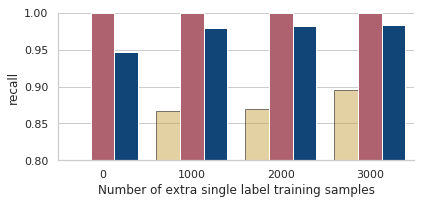

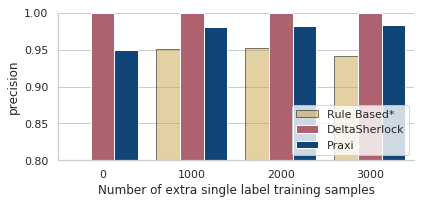

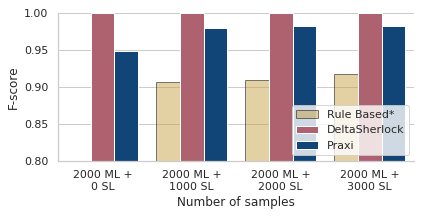

In [23]:
df = pd.read_csv('/home/ates/deltasherlock/experiments/plots/ml_results.csv')

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='recall', 
                   hue_order=['Rule Based*', 'DeltaSherlock', 'Praxi'], 
                   palette=mypalette,
                   legend=False, kind='bar', **kwargs,)
for i, bar in enumerate(g.axes[0][0].patches):
    if i < 4:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.8, 1))
plt.xlabel('Number of extra single label training samples')
#plt.savefig('/home/ates/prospectus/figures/ds_recall.pdf')

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='precision', 
                   hue_order=['Rule Based*', 'DeltaSherlock', 'Praxi'], 
                   palette=mypalette,
                   kind='bar', legend=False, **kwargs,)
for i, bar in enumerate(g.axes[0][0].patches):
    if i < 4:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of extra single label training samples')
#plt.savefig('/home/ates/prospectus/figures/ds_precision.pdf')

df['F-score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='F-score', 
                   hue_order=['Rule Based*', 'DeltaSherlock', 'Praxi'], 
                   palette=mypalette,
                   kind='bar', legend=False, **kwargs,)

for i, bar in enumerate(g.axes[0][0].patches):
    if i < 4:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
g.set_xticklabels(['2000 ML +\n%d SL' % (x * 1000) for x in range(4)])
#plt.xlabel('Number of extra training samples with dependencies')
plt.xlabel('Number of samples')
plt.savefig('/home/ates/deltasherlock/paper/figures/byrne5.pdf', bbox_inches='tight')

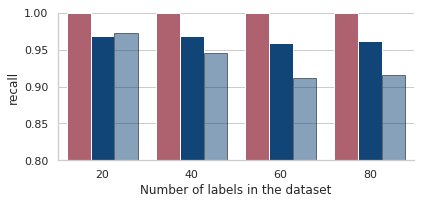

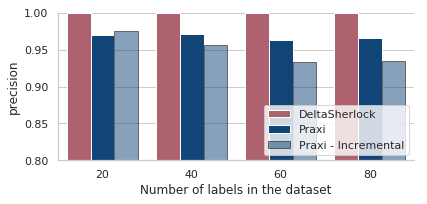

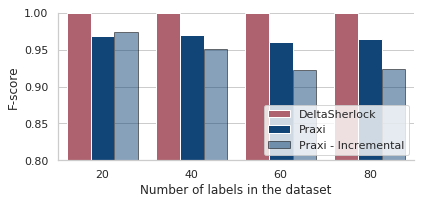

In [24]:
df = pd.read_csv('/home/ates/deltasherlock/experiments/plots/iterative_results.csv')

g = sns.factorplot(data=df, x='label_count', hue='method', y='recall', 
                   hue_order=['DeltaSherlock', 'Praxi', 'Praxi - Incremental'],
                   palette=mypalette[1:],
                   legend=False, kind='bar', **kwargs,)
for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.8, 1))
plt.xlabel('Number of labels in the dataset')
#plt.savefig('/home/ates/prospectus/figures/ds_recall.pdf')

g = sns.factorplot(data=df, x='label_count', hue='method', y='precision',
                   hue_order=['DeltaSherlock', 'Praxi', 'Praxi - Incremental'],
                   palette=mypalette[1:],
                   kind='bar', legend=False, **kwargs,)
for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of labels in the dataset')
#plt.savefig('/home/ates/prospectus/figures/ds_precision.pdf')

df['F-score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

g = sns.factorplot(data=df, x='label_count', hue='method', y='F-score', 
                   hue_order=['DeltaSherlock', 'Praxi', 'Praxi - Incremental'],
                   palette=mypalette[1:],
                   kind='bar', legend=False, **kwargs,)
for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of labels in the dataset')
plt.savefig('/home/ates/deltasherlock/paper/figures/byrne6a.pdf', bbox_inches='tight')

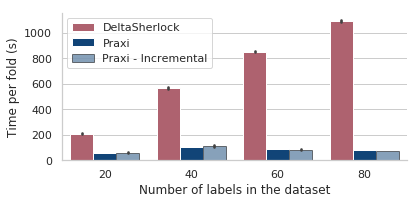

In [25]:
df = pd.read_csv('/home/ates/deltasherlock/experiments/plots/iterative_perf.csv')
df['Total'] = df['Total Train'] + df['Total Test'] + df['CS Load']
df['label_count'] = (df['Chunk'] + 1) * 20
g = sns.factorplot(data=df, x='label_count', hue='Method', y='Total', 
                   hue_order=['DeltaSherlock', 'Praxi', 'Praxi - Incremental'],
                   palette=mypalette[1:],
                   kind='bar', legend=False, **kwargs,)
for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('Number of labels in the dataset')
plt.ylabel('Time per fold (s)')
plt.savefig('/home/ates/deltasherlock/paper/figures/byrne6b.pdf', bbox_inches='tight')